
This Notebook is a graphical illustration of the polyply PMA/PMMA melt system and our gromacs equillibration of that system.

A standard gromacs equilibration approach was used.
Then a short NVT.
Then a further NPT.

The aim of the tutorial was to observe a phase separation between the polymer chains... 
Not sure how long that should take in simulation - we would use NVT for that right?

Note, it is a melt, so we need to cool the system down past the melting point in order to apply to my work...

In [33]:
#Before using this I was using DIT commands from duivytools
#https://duivytools.readthedocs.io/en/latest/DIT_old.html#xvg
#Trouble for some reason with plotting the nvt run... hmm
#This notebook will take inspo from above :)

In [34]:
import glob
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
plt.style.use('dark_background')

In [100]:
def data(filename):
    x, y = np.loadtxt(filename, comments=["@","#"], unpack=True)

    return x, y 
#data('./minim_potential.xvg')
def find(filename, word):
    with open(filename, 'r') as fp:
    # read all lines in a list
        lines = fp.readlines()
        for line in lines:
            # check if string present on a current line
            if line.find(word) != -1:
                #print(word, 'string found')
                #print('Line Number:', lines.index(line))
                #print('Line:', line)
                return line

#print(find('./minim_potential.xvg','xaxis'))
def label(filename, word):
    """
    The labels we are searching for are:
    xaxis
    yaxis
    s0
    """
    out=find(filename, word)
    out1=out.split('\"')    
    #print(out)
    #print(out1)
    return out1[-2]


#print(label("./minim_potential.xvg","s0"))
def plotBasic(filename, show=True):
    print(filename)
    x,y=data(filename)
    xlabel=label(filename,"xaxis")
    ylabel=label(filename,"yaxis")
    legend=label(filename,"s0")
    plt.plot(x,y,label=legend)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    if show:
        plt.show()

#Plotting multiple ensembles
def filelist(datatype="potential",prefixes=["minim","nvt","npt"]):
    list=[]
    for pre in prefixes:
        list.append(f"./{pre}_{datatype}.xvg")
    return list
print(filelist())
def plot3(datatype="potential",prefixes=["minim","nvt","npt"]):
    """
    minimisation, nvt, npt data plot
    datatype follows my 4 letter abbreviations except for potential haha (so far xD -[sorry])
    
    """
    files=filelist(datatype=datatype,prefixes=prefixes)
    to_add=0.0
    for filename in files:
        print(filename)
        x,y    = data(filename)
        x     += to_add
        to_add = x[-1]
        xlabel = label(filename,"xaxis")
        ylabel = label(filename,"yaxis")
        legend = f"{filename.split('_')[0][2:]} {label(filename,'s0')}"
        plt.plot(x,y,label=legend)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
def moving_average(data, window_size):    
    """
    ty chatgpt
    returns moving averages for data
    """
    return np.convolve(data, 
                       np.ones(window_size)/window_size, 
                       mode='valid')
#data=np.linspace(0,100,100)
#moving_average(data,10)
def bigPlot(datatype="potential",prefixes=["minim","nvt","npt"],
            window_size=0,myalpha=0.8):
    """
    minimisation, nvt, npt data plot
    datatype follows my 4 letter abbreviations except for potential haha (so far xD -[sorry])
    """
    files=filelist(datatype=datatype,prefixes=prefixes)
    to_add=0.0
    xs=np.array([])
    ys=np.array([])
    for filename in files:
        print(filename)
        x,y    = data(filename)
        x     += to_add
        to_add = x[-1]
        xlabel = label(filename,"xaxis")
        ylabel = label(filename,"yaxis")
        legend = f"{filename.split('_')[0][2:]} {label(filename,'s0')}"
        plt.plot(x,y,label=legend,alpha=myalpha)
        
        xs=np.append(xs,x)
        ys=np.append(ys,y)
    #print(xs)
    #print(len(xs))
    if window_size != 0:
        xav=np.array(xs[window_size-1:])
        #print(len(xav))
        yav=moving_average(data=np.array(ys),window_size=window_size)
        #print(len(yav))
        xunit=xlabel.split(" ")[1]
        legend=f"{window_size} {xunit} mv av {label(filename,'s0')}"
        plt.plot(xav,yav,label=legend)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
#bigPlot(datatype="potential",prefixes=["minim","nvt","npt"],
#            window_size=100)

['./minim_potential.xvg', './nvt_potential.xvg', './npt_potential.xvg']


Plotting gromacs energy minimisation

./minim_potential.xvg


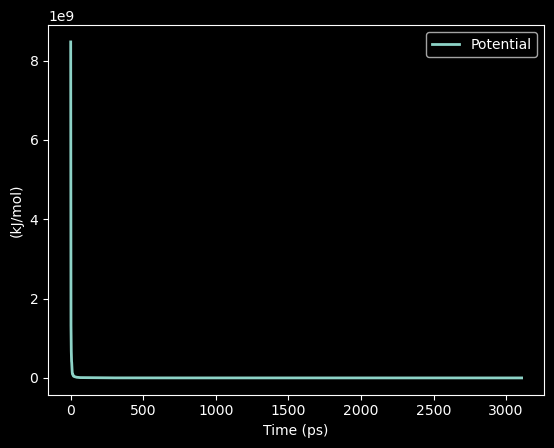

In [90]:
for file in ["./minim_potential.xvg"]:
    plotBasic(file)
    plt.show()

Massive reduction in potential in just 100 ps. Quantified below from oom 10^9 to 10^4.(e9 to e4)

In [91]:
!tail ./minim_potential.xvg


 3095.000000  384745.250000
 3096.000000  384745.125000
 3097.000000  384744.687500
 3099.000000  384744.250000
 3100.000000  384744.062500
 3101.000000  384743.687500
 3102.000000  384743.437500
 3103.000000  384743.062500
 3105.000000  384742.812500
 3107.000000  384742.625000


Looks good in VMD. Just small reconfigs of atoms.

Take this minimised section and run NVT ensemble.
Plotting NVT ensemble relaxation...

./nvt_potential.xvg
./nvt_potential.xvg


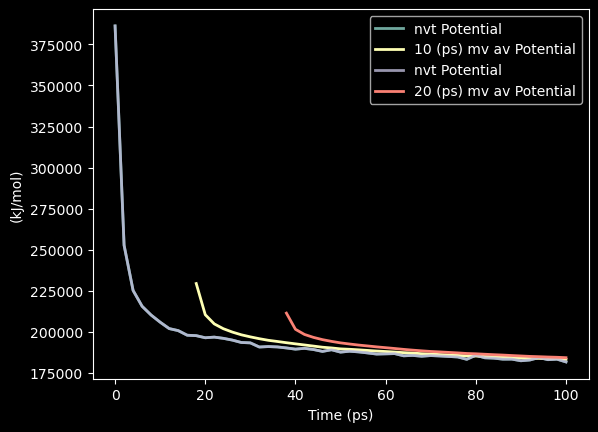

./nvt_totE.xvg
./nvt_totE.xvg


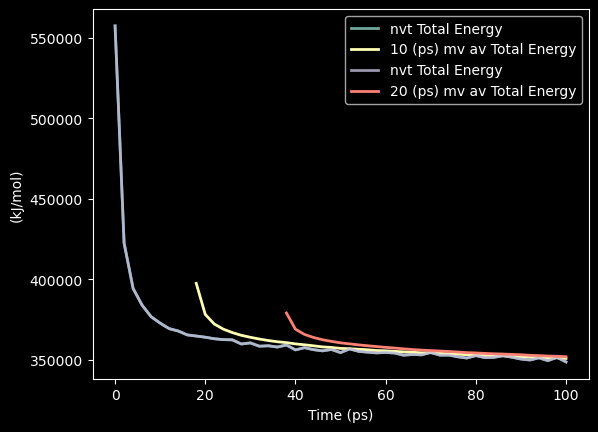

./nvt_temp.xvg
./nvt_temp.xvg


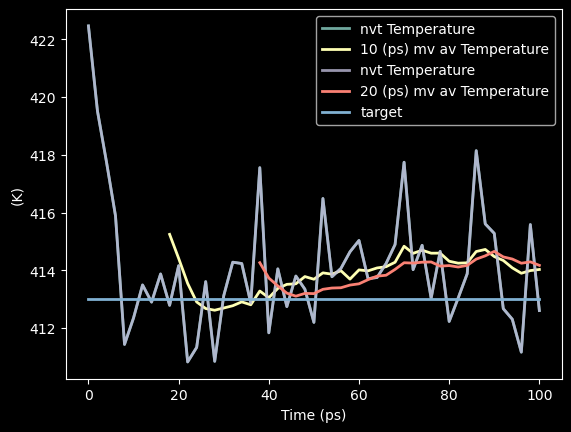

In [92]:
bigPlot(datatype="potential",prefixes=["nvt"],window_size=10)
bigPlot(datatype="potential",prefixes=["nvt"],window_size=20)
plt.show()
bigPlot(datatype="totE",prefixes=["nvt"],window_size=10)
bigPlot(datatype="totE",prefixes=["nvt"],window_size=20)
plt.show()
bigPlot(datatype="temp",prefixes=["nvt"],window_size=10)
bigPlot(datatype="temp",prefixes=["nvt"],window_size=20)
plt.plot(np.linspace(0,100,100),np.ones(100)*413,label='target')
plt.legend()
plt.show()

Potential is significantly reduced. Indication relaxation has occurred. Tapering out to average value also good. 
Same for Tot. Energy. 
Would extend the sim a bit further just to make sure.
Temperature quickly fell into range so sytem seems fine. This is just a short NVT before the main NPT relaxation.
VMD again shows just small reconfigurations of atoms.

Plotting NPT ensemble relaxation

./npt_potential.xvg
./npt_totE.xvg


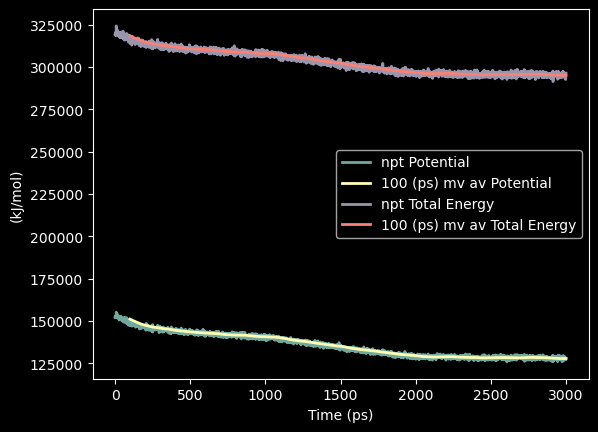

In [93]:
bigPlot(datatype="potential",prefixes=["npt"],window_size=100)
bigPlot(datatype="totE",prefixes=["npt"],window_size=100)
plt.show()


### Potential and Total energy converge to a nice average so system seems well equilibrated...

### It looks like our densities and volumes were pretty much correct. We notice a shift in step with the above relaxation. We are constantly about our constants. Nothing looks off in VMD vis. So polymer melt is equilibrated? :)


from npt.mdp:


; Pressure coupling is on

pcoupl                  = Parrinello-Rahman     ; Pressure coupling on in NPT ; May not be 
appropriate later: "For simulations where the exact fluctations of the NPT ensemble are important, or if the pressure coupling time is very short it may not be appropriate"

pcoupltype              = isotropic             ; uniform scaling of box vectors

tau_p                   = 0.1                   ; time constant, in ps

ref_p                   = 1.0                   ; reference pressure, in bar

compressibility         = 1e-14                 ;From https://pubs.acs.org/doi/10.1021/ma050218b     ; 4.5e-5                ; isothermal compressibility of water, bar^-1

refcoord_scaling        = com

##

./npt_vol.xvg
./npt_dens.xvg
./npt_temp.xvg


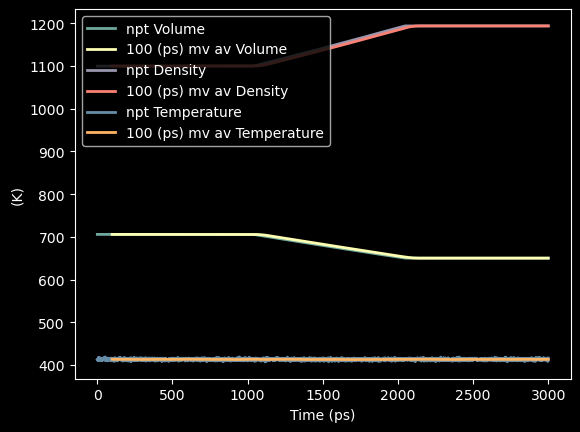

./npt_pres.xvg


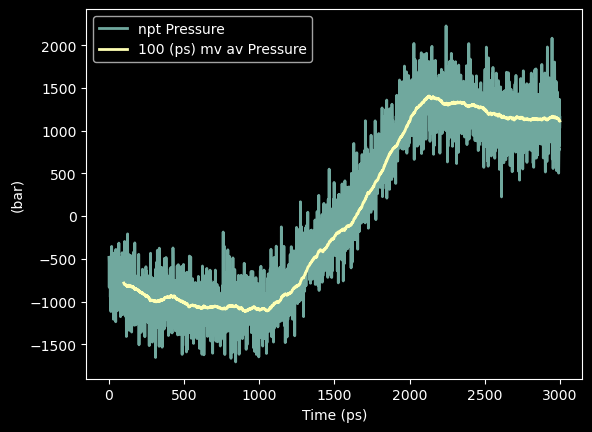

In [94]:
bigPlot(datatype="vol",prefixes=["npt"],window_size=100)
bigPlot(datatype="dens",prefixes=["npt"],window_size=100)
bigPlot(datatype="temp",prefixes=["npt"],window_size=100)
plt.show()
bigPlot(datatype="pres",prefixes=["npt"],window_size=100)
plt.show()

Here's the whole story all in one plot of potential....
Energy minimisation followed by 
NVT ensemble followed by
NPT ensemble

./minim_potential.xvg
./nvt_potential.xvg
./npt_potential.xvg


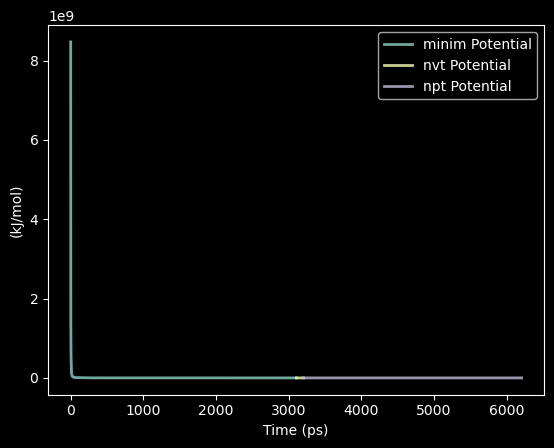

./minim_potential.xvg
./nvt_potential.xvg
./npt_potential.xvg


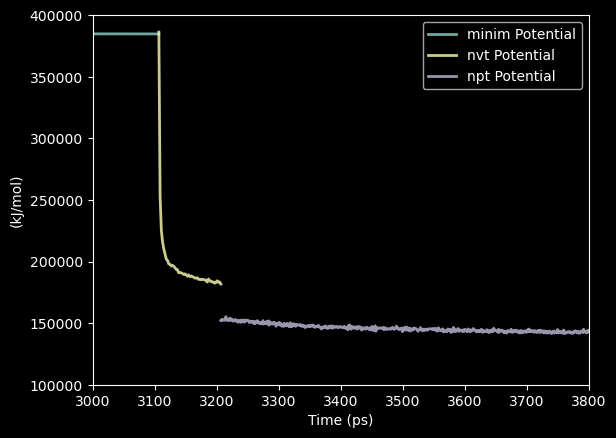

In [95]:
bigPlot(datatype="potential",prefixes=["minim","nvt","npt"])
plt.show()
bigPlot(datatype="potential",prefixes=["minim","nvt","npt"])
plt.ylim([100000,400000])
plt.xlim([3000,3800])
plt.show()


Potential drop between NVT and NPT...

looks like it's just standard when changing from NVT to NPT as we're imposing a force on the system

Below we'll plot temperature of our system, for NVT and NPT together

./nvt_temp.xvg
./npt_temp.xvg


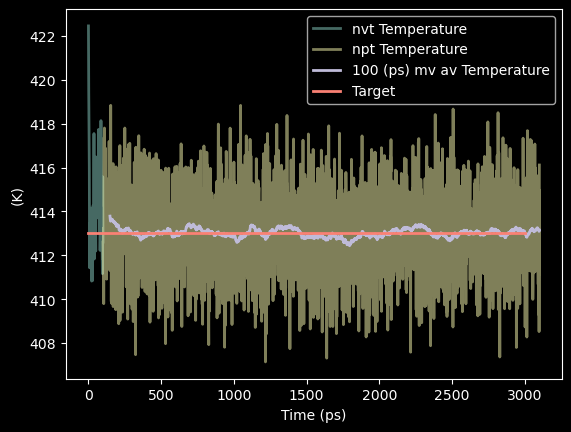

In [46]:
bigPlot(datatype="temp",prefixes=["nvt","npt"],
            window_size=100)
plt.plot(np.linspace(0,3000,2),np.ones(2)*413,label="Target")
plt.legend()
plt.show()

Looks like we meet our target temperature. Further NVT relaxation not necessary as 413 close enough to 414 average in a polymer melt.

Of course, expected to converge for NPT, but do we converge on total energy?

./nvt_totE.xvg
./npt_totE.xvg


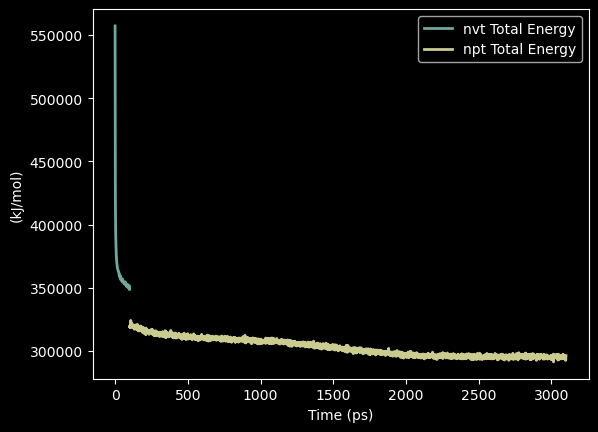

In [96]:
bigPlot(datatype="totE",prefixes=["nvt","npt"],
            window_size=0)
plt.show()

On this scale it does look as though we should run slightly longer NVT sim. But as NPT converges quickly and VMD looks good, it's fine for this tutorial.

Just plotting total energy in NPT simulation again below to confirm we'e reached a stable conformation.

./npt_totE.xvg
./npt_totE.xvg
./npt_totE.xvg


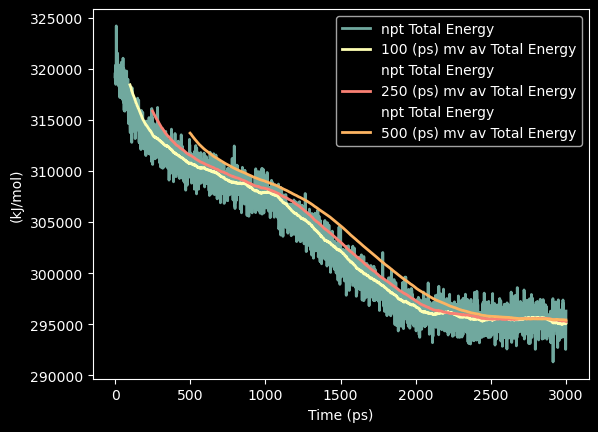

In [101]:
bigPlot(datatype="totE",prefixes=["npt"],
            window_size=100)
bigPlot(datatype="totE",prefixes=["npt"],
            window_size=250,myalpha=0)
bigPlot(datatype="totE",prefixes=["npt"],
            window_size=500,myalpha=0)